# Linear Regression Part (A)
## Getting the Dataset

### Useful functions

In [1377]:
#Function to normalize columns
def normalize_numeric_minmax(df, name):
        df[name] = ((df[name] - df[name].min()) / (df[name].max() - df[name].min())).astype(np.float32)

In [1378]:
# Convert a Pandas dataframe to the x,y inputs that TensorFlow needs
import collections
def to_xy(df, target):
    result = []
    for x in df.columns:
        if x != target:
            result.append(x)
    # find out the type of the target column. 
    target_type = df[target].dtypes
    target_type = target_type[0] if isinstance(target_type, collections.abc.Sequence) else target_type
    # Encode to int for classification, float otherwise. TensorFlow likes 32 bits.
    if target_type in (np.int64, np.int32):
        # Classification
        dummies = pd.get_dummies(df[target])
        return df[result].values.astype(np.float32), dummies.values.astype(np.float32)
    else:
        # Regression
        return df[result].values.astype(np.float32), df[target].values.astype(np.float32)

In [1379]:
# Regression chart.
def chart_regression(pred,y,sort=True):
    t = pd.DataFrame({'pred' : pred, 'y' : y.flatten()})
    if sort:
        t.sort_values(by=['y'],inplace=True)
    a = plt.plot(t['y'].tolist(),label='expected')
    b = plt.plot(t['pred'].tolist(),label='prediction')
    plt.ylabel('output')
    plt.legend()
    plt.show()

In [1380]:
%matplotlib inline
import os
import numpy as np
import pandas as pd
from scipy.stats import zscore
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

path = "./"

filename_read = os.path.join(path,"drinks.csv")
drink_Data = pd.read_csv(filename_read, na_values=['NA','?'])
drink_Data.head(10)

,country,beer_servings,spirit_servings,wine_servings,total_litres_of_pure_alcohol,continent
0,Afghanistan,0,0,0,0.0,Asia
1,Albania,89,132,54,4.9,Europe
2,Algeria,25,0,14,0.7,Africa
3,Andorra,245,138,312,12.4,Europe
4,Angola,217,57,45,5.9,Africa
5,Antigua & Barbuda,102,128,45,4.9,North America
6,Argentina,193,25,221,8.3,South America
7,Armenia,21,179,11,3.8,Europe
8,Australia,261,72,212,10.4,Oceania
9,Austria,279,75,191,9.7,Europe


## Simple Linear Regression

Creating a new dataset for holding onto the columns needed for Simple Linear Regression. In the new dataset we made, it has a new column called 'Combine_Servings' that takes the total amount of beer, spirit, and wine serverings.

In [1381]:
import pandas as pd

drink_Data.head()

new_drink_Data = drink_Data[['beer_servings', 'spirit_servings', 'wine_servings', 'total_litres_of_pure_alcohol']]

new_drink_Data['Combine_Servings'] = (new_drink_Data['beer_servings'] + new_drink_Data['spirit_servings'] + new_drink_Data['wine_servings'])

new_drink_Data.head()

C:\Users\sho85\AppData\Local\Temp\ipykernel_51076\3497493988.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_drink_Data['Combine_Servings'] = (new_drink_Data['beer_servings'] + new_drink_Data['spirit_servings'] + new_drink_Data['wine_servings'])


,beer_servings,spirit_servings,wine_servings,total_litres_of_pure_alcohol,Combine_Servings
0,0,0,0,0.0,0
1,89,132,54,4.9,275
2,25,0,14,0.7,39
3,245,138,312,12.4,695
4,217,57,45,5.9,319


### Preparing our train/test
Here, we create an x and y varaible that looks at the independent variable, Combine_Servings, and the dependent variable, Total_Litres_of_Pure_Alcohol. We then use the train_test_split method to split of our data into 2 different types, one for training and one for testing. We made the test size take 25% of the data and stored it to a random seed on 1.

In [1382]:
x = new_drink_Data.iloc[:, 4].values  #independent variable arrays, Combine_Servings
y = new_drink_Data.iloc[:, 3].values  #dependent variable arrays, Total_Litres_Of_Pure_Alcohol

In [1383]:
# Split
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=1/4, random_state=1)

The code snippet below is to reshape the training and testing of the independent variable into a 2-dimensional arrays for plotting purposes

In [1384]:
# Making the training and testing 2 Dimensional arrays
x_train = np.array(x_train).reshape(-1, 1)
x_train

array([[274],
       [571],
       [385],
       [275],
       [  6],
       [583],
       [ 86],
       [328],
       [  6],
       [643],
       [404],
       [ 51],
       [ 55],
       [111],
       [123],
       [219],
       [106],
       [ 28],
       [553],
       [  0],
       [112],
       [  0],
       [  6],
       [234],
       [431],
       [369],
       [ 57],
       [  0],
       [ 49],
       [ 57],
       [665],
       [ 56],
       [279],
       [605],
       [488],
       [  0],
       [559],
       [  0],
       [  6],
       [640],
       [ 56],
       [634],
       [257],
       [134],
       [156],
       [ 39],
       [ 11],
       [295],
       [134],
       [439],
       [ 17],
       [  0],
       [233],
       [123],
       [638],
       [325],
       [380],
       [ 82],
       [529],
       [  0],
       [504],
       [169],
       [185],
       [ 83],
       [ 17],
       [382],
       [600],
       [122],
       [370],
       [ 72],
       [ 17],
      

In [1385]:
x_test = np.array(x_test).reshape(-1, 1)
x_test

array([[459],
       [124],
       [ 21],
       [426],
       [ 43],
       [349],
       [197],
       [596],
       [130],
       [ 54],
       [ 62],
       [ 39],
       [216],
       [591],
       [147],
       [463],
       [ 45],
       [349],
       [152],
       [ 80],
       [ 36],
       [319],
       [  0],
       [436],
       [ 18],
       [  0],
       [ 30],
       [141],
       [ 11],
       [407],
       [ 44],
       [ 11],
       [ 23],
       [188],
       [ 50],
       [352],
       [328],
       [ 23],
       [398],
       [  0],
       [273],
       [360],
       [165],
       [541],
       [ 20],
       [  6],
       [120],
       [113],
       [565]], dtype=int64)

### Fitting
Here, we fit the training variables and display the intercept and slope of the line once fitted.

In [1386]:
# Fitting
from sklearn import linear_model
from sklearn.metrics import mean_squared_error, r2_score
regressor = linear_model.LinearRegression()
regressor.fit(x_train, y_train)

LinearRegression()

In [1387]:
regressor.score(x_test, y_test)

0.6980800923002739

In [1388]:
regressor.score(x_train, y_train)

0.9140145685882098

In [1389]:
intercept = regressor.intercept_
intercept

0.5227534772978712

In [1390]:
slope = regressor.coef_
slope

array([0.01733409])

### Predicting
In this section, we use the predict method to predict the outcome of x_train and x_test and store it into a variable used for plotting to see how close our model is to the actual data

In [1391]:
# Predicting; y_pred are the predicted results of the Combine_Servings
y_pred_train = regressor.predict(x_train)
y_pred_train

array([ 5.27229528, 10.42052124,  7.19637973,  5.28962937,  0.62675804,
       10.62853037,  2.01348557,  6.20833636,  0.62675804, 11.66857602,
        7.52572752,  1.40679228,  1.47612866,  2.44683793,  2.65484706,
        4.3189201 ,  2.36016746,  1.00810811, 10.10850755,  0.52275348,
        2.46417202,  0.52275348,  0.62675804,  4.57893151,  7.99374806,
        6.91903422,  1.51079684,  0.52275348,  1.37212409,  1.51079684,
       12.04992609,  1.49346275,  5.35896575, 11.00988044,  8.98179143,
        0.52275348, 10.21251211,  0.52275348,  0.62675804, 11.61657374,
        1.49346275, 11.51256917,  4.97761568,  2.84552209,  3.22687217,
        1.19878315,  0.71342851,  5.63631125,  2.84552209,  8.13242081,
        0.81743308,  0.52275348,  4.56159742,  2.65484706, 11.58190555,
        6.15633408,  7.10970926,  1.9441492 ,  9.69248929,  0.52275348,
        9.25913693,  3.45221539,  3.7295609 ,  1.96148329,  0.81743308,
        7.14437745, 10.92320997,  2.63751296,  6.93636832,  1.77

Plotting the training data first and including the predicted train set on y (red line)

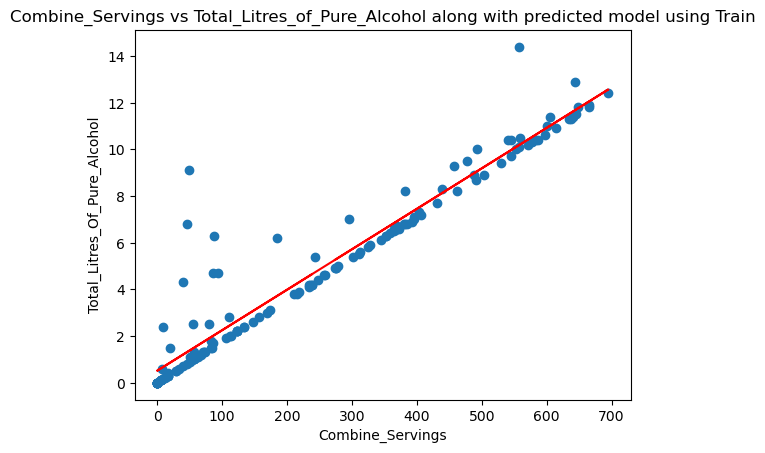

In [1392]:
import matplotlib.pyplot as plt
plt.scatter(x_train, y_train) # plotting the observation line
plt.plot(x_train, y_pred_train, color='red') # plotting the observation line but using the predicted dependent variable

plt.title("Combine_Servings vs Total_Litres_of_Pure_Alcohol along with predicted model using Train") # stating the title of the graph
 
plt.xlabel("Combine_Servings") # adding the name of x-axis
plt.ylabel("Total_Litres_Of_Pure_Alcohol") # adding the name of y-axis
plt.show() # specifies end of graph

Predicting using the testing dataset now

In [1393]:
from sklearn import linear_model
lasso_reg = linear_model.Lasso(alpha=50, max_iter=100, tol=0.1)

lasso_reg.fit(x_test, y_test)

lasso_reg.score(x_test, y_test)

0.7160877321531964

In [1394]:
lasso_reg.fit(x_train, y_train)

lasso_reg.score(x_train, y_train)

0.9104229115882162

In [1395]:
y_pred_test = regressor.predict(x_test)
y_pred_test

array([ 8.4791027 ,  2.67218115,  0.88676945,  7.90707759,  1.26811953,
        6.57235234,  3.93757003, 10.8538736 ,  2.77618572,  1.45879456,
        1.59746732,  1.19878315,  4.26691782, 10.76720313,  3.07086532,
        8.54843907,  1.30278771,  6.57235234,  3.15753579,  1.90948101,
        1.14678087,  6.05232951,  0.52275348,  8.08041853,  0.83476717,
        0.52275348,  1.0427763 ,  2.96686075,  0.71342851,  7.5777298 ,
        1.28545362,  0.71342851,  0.92143764,  3.78156318,  1.38945819,
        6.62435462,  6.20833636,  0.92143764,  7.42172295,  0.52275348,
        5.25496118,  6.76302737,  3.38287901,  9.90049842,  0.86943536,
        0.62675804,  2.60284478,  2.48150612, 10.31651668])

In [1396]:
y_pred_lasso_test = lasso_reg.predict(x_test)
y_pred_lasso_test

array([ 8.25308869,  2.81018009,  1.13668879,  7.71692157,  1.49413353,
        6.46586497,  3.99624674, 10.47899459,  2.90766502,  1.6728559 ,
        1.80283581,  1.42914358,  4.30494902, 10.39775715,  3.18387232,
        8.31807864,  1.52662851,  6.46586497,  3.26510976,  2.0952906 ,
        1.38040111,  5.97844032,  0.79549153,  7.87939646,  1.08794632,
        0.79549153,  1.28291618,  3.08638739,  0.97421391,  7.40821929,
        1.51038102,  0.97421391,  1.16918377,  3.85001934,  1.60786595,
        6.51460744,  6.12466771,  1.16918377,  7.2619919 ,  0.79549153,
        5.23105585,  6.64458734,  3.47632711,  9.58538273,  1.1204413 ,
        0.89297646,  2.74519014,  2.63145772,  9.97532245])

Plotting the testing data and observing how closely it resembles our train data.

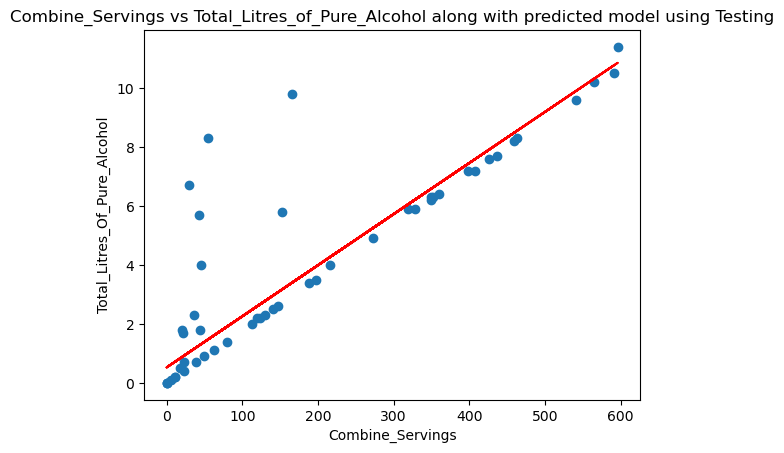

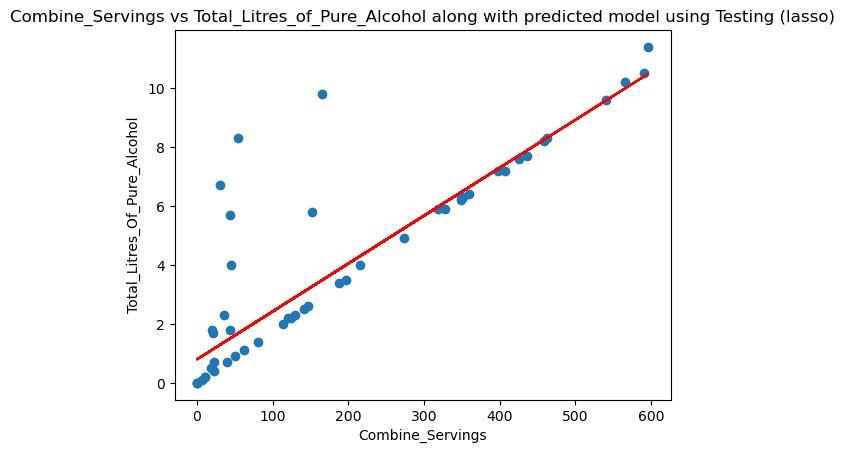

In [1397]:
#plot for the TRAIN
import matplotlib.pyplot as plt
plt.scatter(x_test, y_test) # data scattered on the graph 
plt.plot(x_test, y_pred_test, color='red') # plotting the observation line

plt.title("Combine_Servings vs Total_Litres_of_Pure_Alcohol along with predicted model using Testing") # stating the title of the graph
 
plt.xlabel("Combine_Servings") # adding the name of x-axis
plt.ylabel("Total_Litres_Of_Pure_Alcohol") # adding the name of y-axis
plt.show() # specifies end of graph

plt.scatter(x_test, y_test) # data scattered on the graph 
plt.plot(x_test, y_pred_lasso_test, color='red') # plotting the observation line

plt.title("Combine_Servings vs Total_Litres_of_Pure_Alcohol along with predicted model using Testing (lasso)") # stating the title of the graph
 
plt.xlabel("Combine_Servings") # adding the name of x-axis
plt.ylabel("Total_Litres_Of_Pure_Alcohol") # adding the name of y-axis
plt.show() # specifies end of graph

### Finding the mean squarred error and the R-squared on both the testing and training models.
Mean Squared Error: how much the residuals vary around the fitted lines <br>
R-Squared: Correlation between x and y; ranges from 0 to 1; higher the number the better the model

In [1398]:
# Model evaluation
print("Root mean squared error on testing = %.4f" % np.sqrt(mean_squared_error(y_test, y_pred_test)))
print('R-squared on testing= %.4f' % r2_score(y_test, y_pred_test))

print("Root mean squared error on training = %.4f" % np.sqrt(mean_squared_error(y_train, y_pred_train)))
print('R-squared on training = %.4f' % r2_score(y_train, y_pred_train))

Root mean squared error on testing = 1.8266
R-squared on testing= 0.6981
Root mean squared error on training = 1.1405
R-squared on training = 0.9140


## Multiple Linear Regression
Using the same dataset, drinks.csv, we used all three servings columns, beer, spirit, and wine, as independent variables and have the dependent variable be the Total_litres_of_Pure_Alcohol. We then split the data into training and testing varaibles, saving only 25% for testing.

In [1399]:
from sklearn.model_selection import train_test_split
from sklearn import preprocessing

path = "./"

filename_read = os.path.join(path,"drinks.csv")
drink_Data = pd.read_csv(filename_read, na_values=['NA','?'])

x_train2, x_test2, y_train2, y_test2 = train_test_split(
  drink_Data[['beer_servings', 'spirit_servings', 'wine_servings']], 
  drink_Data['total_litres_of_pure_alcohol'], 
  test_size=0.25,
  random_state=0)
print("x_train shape: ", x_train2.shape)
print("y_train shape: ", y_train2.shape)

print("x_test shape: ", x_test2.shape)
print("y_test shape: ", y_test2.shape)

x_train shape:  (144, 3)
y_train shape:  (144,)
x_test shape:  (49, 3)
y_test shape:  (49,)


### Fitting the training models
Here, we fit the training model and display the y-intercept and slope

In [1400]:
# Create linear regression object
regr = linear_model.LinearRegression()

# Fit regression model to the training set
regr.fit(x_train2, y_train2)

LinearRegression()

In [1401]:
regr.score(x_test2, y_test2)

0.8184310767713026

In [1402]:
regr.score(x_train2, y_train2)

0.8905004885512054

In [1403]:
intercept = regr.intercept_
intercept

0.6137880966226286

In [1404]:
slope = regr.coef_
slope

array([0.01803339, 0.0163801 , 0.01632606])

Predicting the training data first

In [1405]:
# Apply model to the test set
y_pred_train2 = regr.predict(x_train2)
y_pred_train2

array([ 7.99262056,  0.7743813 ,  9.11875129,  2.00813573,  3.49599407,
        1.02855614,  0.97099653,  1.48574322,  2.71440351,  1.82016526,
       10.77069164,  6.64904208,  5.2288066 ,  6.6414857 ,  5.98246162,
       10.01637971,  6.70386638,  3.73996358,  3.54747923,  1.9091526 ,
        0.89555637,  6.61405857,  2.20072668, 10.23148858,  2.84473247,
        0.6137881 ,  2.66458098,  6.10121268,  9.43986262,  1.29318773,
        2.59198889,  0.6137881 ,  3.18271273,  4.61659755,  1.82760421,
        0.6137881 ,  5.98805994,  2.84962142,  2.12807127,  7.39436826,
        0.72198845,  8.30589608,  4.68716223,  6.85266449,  6.66071046,
        0.6137881 ,  2.38146922,  0.95456239,  2.56754921,  5.62211709,
       10.74426661,  4.90541894,  2.7324369 ,  1.65399154, 10.51870026,
        5.57235636,  0.6137881 ,  6.57738386,  7.66830072,  8.94542321,
        7.53945195,  4.42755727,  9.9700014 ,  0.72033516,  0.73666122,
        4.79630329,  1.39366204,  7.08818724, 12.38615314,  0.72

Plotting the training and predicted variables of the dependent values and showing the root mean squarred error and R-squarred score

Root mean squared error = 1.2451
R-squared = 0.8905


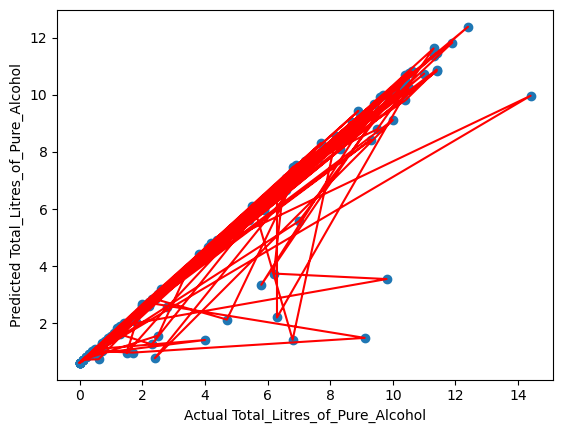

In [1406]:
# Model evaluation
print("Root mean squared error = %.4f" % np.sqrt(mean_squared_error(y_train2, y_pred_train2)))
print('R-squared = %.4f' % r2_score(y_train2, y_pred_train2))

plt.scatter(y_train2, y_pred_train2)
plt.plot(y_train2, y_pred_train2, color="red")
plt.xlabel("Actual Total_Litres_of_Pure_Alcohol")
plt.ylabel("Predicted Total_Litres_of_Pure_Alcohol")
plt.show()

Using the testing data now to apply multiple linear regression

In [1407]:
y_pred_test2 = regr.predict(x_test2)

Root mean squared error = 1.5794
R-squared = 0.8184


Text(0, 0.5, 'Predicted Litres_of_Pure_Alcohol')

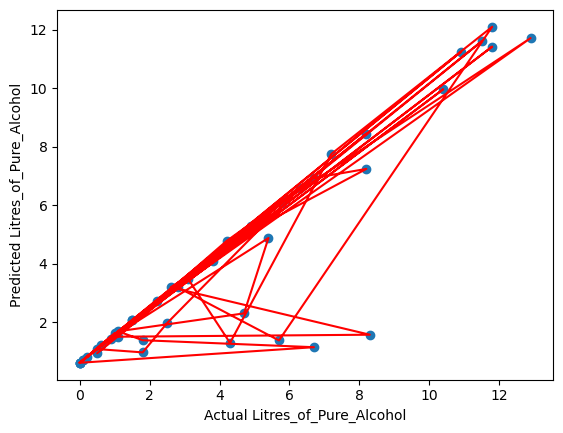

In [1408]:
# Model evaluation
print("Root mean squared error = %.4f" % np.sqrt(mean_squared_error(y_test2, y_pred_test2)))
print('R-squared = %.4f' % r2_score(y_test2, y_pred_test2))

plt.scatter(y_test2, y_pred_test2)
plt.plot(y_test2, y_pred_test2, color="red")
plt.xlabel("Actual Litres_of_Pure_Alcohol")
plt.ylabel("Predicted Litres_of_Pure_Alcohol")

## Regression and Classification
Using Admission dataset

In [1409]:
%matplotlib inline
import os
import numpy as np
import pandas as pd
from scipy.stats import zscore
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

path = "./"

filename_read = os.path.join(path,"Admission_Predict_Ver1.1_small_data_set_for_Linear_Regression.csv")
admission_Data = pd.read_csv(filename_read, na_values=['NA','?'])

print(admission_Data.shape)
print(admission_Data.isnull().sum())
admission_Data.head(10)

(500, 9)
Serial No.           0
GRE Score            0
TOEFL Score          0
University Rating    0
SOP                  0
LOR                  0
CGPA                 0
Research             0
Chance of Admit      0
dtype: int64


,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
0,1,337,118,4,4.5,4.5,9.65,1,0.92
1,2,324,107,4,4.0,4.5,8.87,1,0.76
2,3,316,104,3,3.0,3.5,8.00,1,0.72
3,4,322,110,3,3.5,2.5,8.67,1,0.80
4,5,314,103,2,2.0,3.0,8.21,0,0.65
5,6,330,115,5,4.5,3.0,9.34,1,0.90
6,7,321,109,3,3.0,4.0,8.20,1,0.75
7,8,308,101,2,3.0,4.0,7.90,0,0.68
8,9,302,102,1,2.0,1.5,8.00,0,0.50
9,10,323,108,3,3.5,3.0,8.60,0,0.45


Convert CGPA to the normal GPA style which ranges from 1 to 5

In [1410]:
normalize_numeric_minmax(admission_Data, 'CGPA')
normalize_numeric_minmax(admission_Data, 'GRE Score')
normalize_numeric_minmax(admission_Data, 'TOEFL Score')

admission_Data

,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
0,1,0.94,0.928571,4,4.5,4.5,0.913462,1,0.92
1,2,0.68,0.535714,4,4.0,4.5,0.663462,1,0.76
2,3,0.52,0.428571,3,3.0,3.5,0.384615,1,0.72
3,4,0.64,0.642857,3,3.5,2.5,0.599359,1,0.80
4,5,0.48,0.392857,2,2.0,3.0,0.451923,0,0.65
...,...,...,...,...,...,...,...,...,...
495,496,0.84,0.571429,5,4.5,4.0,0.711538,1,0.87
496,497,0.94,0.892857,5,5.0,5.0,0.983974,1,0.96
497,498,0.80,1.000000,5,4.5,5.0,0.884615,1,0.93
498,499,0.44,0.392857,4,4.0,5.0,0.522436,0,0.73


In [1411]:
from sklearn.model_selection import train_test_split
from sklearn import preprocessing

x_train3, x_test3, y_train3, y_test3 = train_test_split(
    admission_Data[['CGPA', 'GRE Score', 'TOEFL Score']],
    admission_Data['Chance of Admit'],
    test_size=0.25,
    random_state=3
)

print("x_train shape: ", x_train3.shape)
print("y_train shape: ", y_train3.shape)

print("x_test shape: ", x_test3.shape)
print("y_test shape: ", y_test3.shape)

x_train shape:  (375, 3)
y_train shape:  (375,)
x_test shape:  (125, 3)
y_test shape:  (125,)


In [1412]:
from sklearn import linear_model
# Create linear regression object
regr = linear_model.LinearRegression()

# Fit regression model to the training set
regr.fit(x_train3, y_train3)

LinearRegression()

In [1413]:
# Apply model to the test set
y_pred_train3 = regr.predict(x_train3)
y_pred_train3

array([0.5957527 , 0.5344182 , 0.572998  , 0.48920518, 0.6543493 ,
       0.66508603, 0.98268247, 0.6830817 , 0.8198837 , 0.6956224 ,
       0.7520336 , 0.8317158 , 0.83343685, 0.68704337, 0.77066666,
       0.6060681 , 0.90334165, 0.8375238 , 0.78259057, 0.8355262 ,
       0.5856794 , 0.6509074 , 0.7249781 , 0.6042011 , 0.93569314,
       0.8913312 , 0.6771483 , 0.924814  , 0.63431954, 0.8057968 ,
       0.7142242 , 0.69747645, 0.6298511 , 0.7647462 , 0.90805316,
       0.8145218 , 0.6979443 , 0.8221632 , 0.78018904, 0.90039873,
       0.7579887 , 0.75721717, 0.8384303 , 0.8424049 , 0.83205837,
       0.5990953 , 0.68530595, 0.64424586, 0.9302329 , 0.7740039 ,
       0.8525949 , 0.6371371 , 0.9354329 , 0.5271063 , 0.7588681 ,
       0.68262255, 0.56327057, 0.67552674, 0.574085  , 0.963143  ,
       0.73787665, 0.79336613, 0.5669503 , 0.8085573 , 0.88372445,
       0.6157254 , 0.64590204, 0.5275731 , 0.9405613 , 0.95197415,
       0.89457774, 0.65544164, 0.8891641 , 0.77048075, 0.90619

Root mean squared error = 0.0599
R-squared = 0.8211


Text(0, 0.5, 'Predicted Chance of Admission')

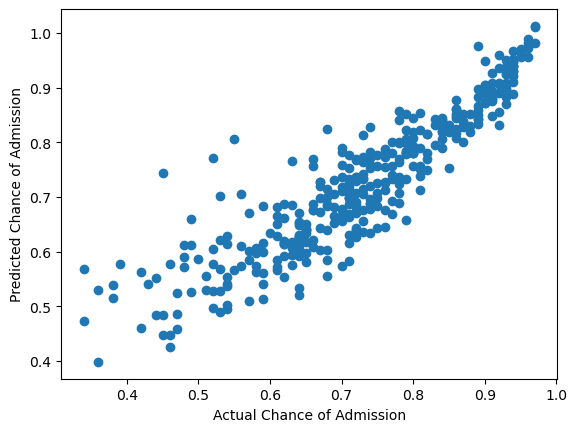

In [1414]:
# Model evaluation
print("Root mean squared error = %.4f" % np.sqrt(mean_squared_error(y_train3, y_pred_train3)))
print('R-squared = %.4f' % r2_score(y_train3, y_pred_train3))

plt.scatter(y_train3, y_pred_train3)
plt.xlabel("Actual Chance of Admission")
plt.ylabel("Predicted Chance of Admission")

### Classification

In [1415]:
# %matplotlib inline
# import os
# import numpy as np
# import pandas as pd
# from scipy.stats import zscore
# import matplotlib.pyplot as plt
# import matplotlib.image as mpimg
import pandas as pd
from sklearn.tree import DecisionTreeClassifier # Import Decision Tree Classifier
from sklearn.model_selection import train_test_split # Import train_test_split function
from sklearn import metrics #Import scikit-learn metrics module for accuracy calculation

path = "./"

filename_read = os.path.join(path,"Admission_Predict_Ver1.1_small_data_set_for_Linear_Regression.csv")
admission_Data = pd.read_csv(filename_read, na_values=['NA','?'])

print(admission_Data.shape)
print(admission_Data.isnull().sum())
admission_Data.head(10)

(500, 9)
Serial No.           0
GRE Score            0
TOEFL Score          0
University Rating    0
SOP                  0
LOR                  0
CGPA                 0
Research             0
Chance of Admit      0
dtype: int64


,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
0,1,337,118,4,4.5,4.5,9.65,1,0.92
1,2,324,107,4,4.0,4.5,8.87,1,0.76
2,3,316,104,3,3.0,3.5,8.00,1,0.72
3,4,322,110,3,3.5,2.5,8.67,1,0.80
4,5,314,103,2,2.0,3.0,8.21,0,0.65
5,6,330,115,5,4.5,3.0,9.34,1,0.90
6,7,321,109,3,3.0,4.0,8.20,1,0.75
7,8,308,101,2,3.0,4.0,7.90,0,0.68
8,9,302,102,1,2.0,1.5,8.00,0,0.50
9,10,323,108,3,3.5,3.0,8.60,0,0.45


In [1416]:
normalize_numeric_minmax(admission_Data, 'CGPA')
normalize_numeric_minmax(admission_Data, 'GRE Score')
normalize_numeric_minmax(admission_Data, 'TOEFL Score')

admission_Data

,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
0,1,0.94,0.928571,4,4.5,4.5,0.913462,1,0.92
1,2,0.68,0.535714,4,4.0,4.5,0.663462,1,0.76
2,3,0.52,0.428571,3,3.0,3.5,0.384615,1,0.72
3,4,0.64,0.642857,3,3.5,2.5,0.599359,1,0.80
4,5,0.48,0.392857,2,2.0,3.0,0.451923,0,0.65
...,...,...,...,...,...,...,...,...,...
495,496,0.84,0.571429,5,4.5,4.0,0.711538,1,0.87
496,497,0.94,0.892857,5,5.0,5.0,0.983974,1,0.96
497,498,0.80,1.000000,5,4.5,5.0,0.884615,1,0.93
498,499,0.44,0.392857,4,4.0,5.0,0.522436,0,0.73


In [1417]:
feature_cols = ['GRE Score', 'TOEFL Score', 'CGPA']
x = admission_Data[feature_cols]
y = admission_Data['Chance of Admit']

In [1418]:
x_train4, x_test4, y_train4, y_test4 = train_test_split(x, y, test_size=0.25, random_state=10)

In [1419]:
from sklearn.tree import DecisionTreeRegressor
clf = DecisionTreeRegressor(random_state = 0)
clf = clf.fit(x_train4, y_train4)

In [1420]:
y_pred_test4 = clf.predict(x_test4)
y_pred_test4

array([0.93 , 0.9  , 0.86 , 0.86 , 0.68 , 0.73 , 0.75 , 0.73 , 0.73 ,
       0.76 , 0.94 , 0.79 , 0.84 , 0.72 , 0.52 , 0.67 , 0.78 , 0.95 ,
       0.7  , 0.66 , 0.76 , 0.73 , 0.62 , 0.86 , 0.34 , 0.9  , 0.71 ,
       0.57 , 0.71 , 0.7  , 0.94 , 0.79 , 0.59 , 0.73 , 0.81 , 0.78 ,
       0.78 , 0.68 , 0.71 , 0.71 , 0.9  , 0.72 , 0.7  , 0.94 , 0.96 ,
       0.36 , 0.67 , 0.8  , 0.86 , 0.72 , 0.45 , 0.73 , 0.74 , 0.58 ,
       0.81 , 0.8  , 0.88 , 0.42 , 0.8  , 0.93 , 0.73 , 0.9  , 0.81 ,
       0.52 , 0.77 , 0.595, 0.72 , 0.73 , 0.59 , 0.7  , 0.91 , 0.595,
       0.65 , 0.69 , 0.81 , 0.57 , 0.72 , 0.81 , 0.85 , 0.72 , 0.75 ,
       0.68 , 0.73 , 0.8  , 0.8  , 0.8  , 0.78 , 0.64 , 0.73 , 0.94 ,
       0.88 , 0.72 , 0.45 , 0.85 , 0.82 , 0.54 , 0.8  , 0.96 , 0.34 ,
       0.7  , 0.82 , 0.94 , 0.72 , 0.57 , 0.91 , 0.49 , 0.79 , 0.37 ,
       0.79 , 0.92 , 0.42 , 0.72 , 0.79 , 0.68 , 0.81 , 0.61 , 0.82 ,
       0.53 , 0.8  , 0.45 , 0.71 , 0.93 , 0.8  , 0.73 , 0.8  ])

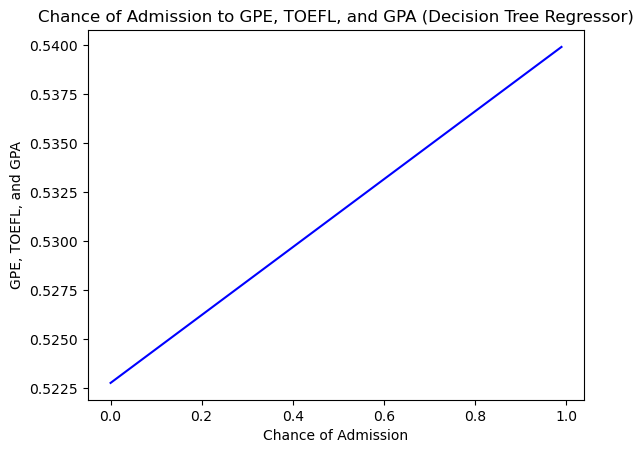

In [1421]:
# arange for creating a range of values
# from min value of X to max value of X
# with a difference of 0.01 between two
# consecutive values
X_grid = np.arange(min(np.any(x_test4), 0), max(np.any(x_test4), 0), 0.01)

# reshape for reshaping the data into
# a len(X_grid)*1 array, i.e. to make
# a column out of the X_grid values

X_grid = X_grid.reshape((len(X_grid), 1))

plt.plot(X_grid, regressor.predict(X_grid), color = 'blue')
plt.title('Chance of Admission to GPE, TOEFL, and GPA (Decision Tree Regressor)')
plt.xlabel('Chance of Admission')
plt.ylabel('GPE, TOEFL, and GPA')
plt.show()